# Regression Methods

In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). Particularly, the case for just one explanatory variable is known as simple linear regression. 

In this notebook, there is an example of an implementation of both a Simple Linear Regression and a Multiple Linear regression. Along with our journey we'll implement some code, explain and clarify some concepts about linear regression models.

We'll explore basic concepts about statistics in order to talk about model performance and evaluation. Therefore, it is very helpful to have knowledge in basic descriptive statistics, inferential statistics and hypothesis testing.

After implementing the regression models and discuss which are the good determinants of a linear regression, we'll summary the 5 regression assumptions. These 5 assumptions are crucial to the linear regression model and must be taken into account before performing a linear regression.

For further studies on Linear Regression, you can start on [Wikipedia](https://en.wikipedia.org/wiki/Linear_regression).
Also, there are a bunch of good topics covered about regression (with examples) in [Statistics by Jim](http://statisticsbyjim.com/regression/). Finally, some sections and examples are based on the [udemy](https://www.udemy.com/) course [The Data Science Course 2019: Complete Data Science Bootcamp](https://www.udemy.com/the-data-science-course-complete-data-science-bootcamp/) material.

## 1. Simple Linear Regression

The dataset used in this section is in a .csv file with GPA and SAT scores from some fictitious US students. We'll analyze this dataset and perform a linear regression on the data in order to get some information about the performance of college students and how it is correlated with their SAT score.

### Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load the data

In [2]:
path_name = r'C:\Users\alexa\Documents\Data Science Course - Bootcamp\Regression Analysis\datasets\1. Simple linear regression.csv'
data = pd.read_csv(path_name)

In [3]:
# Visualize your data
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [4]:
# Visualize some statistics about your data
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


### 1.1 Create your first regression

#### Define the dependent and the independent variable

As we are trying to figure out how good is the SAT score to predict college students GPA. By definition, our dependent variable, $y$, is the GPA score and the independent variable, $x_1$, the SAT score. So, we'll split our dataset into these two classes.

In [5]:
y = data['GPA']
x1 = data['SAT']

#### Explore the data

From the plot below, we can clearly see that there is a correlation (not necessarily causation) between the SAT score and the GPA score.

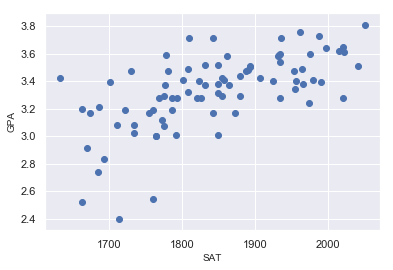

In [6]:
plt.scatter(x1,y)

plt.xlabel('SAT',fontsize=10)
plt.ylabel('GPA',fontsize=10)
plt.show()

#### Regression itself

A simple linear regression model is described by the following equation: 

$$\hat{y} = b_0 + b_1 \times x_1$$

where $b_0$ is called intercept and $b_1$ is the coefficient of $x$, which is the input (independent) variable. For computational reasons, we must add a constant column of 1's representing the coefficients of the intercept. Hence, our regression equation becomes

$$\hat{y} = b_0 \times 1 + b_1 \times x_1$$

then, we are free to apply the Ordinary Least Squares method to the data.

Lastly, it's a good practice to summarize the results in order to get some insights about the model like the relevance of the features and how good our model fits the data.

In [7]:
x = sm.add_constant(x1)

In [8]:
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Mon, 04 Mar 2019   Prob (F-statistic):           7.20e-11
Time:                        18:35:41   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now that we have fitted the linear regression model to our data, it is time to visualize the outcomes. First of all, Let's have a look at the table above. Typically, every time we use statsmodels we'll have three main tables, namely:

    1. Model Summary Table
    2. Coefficients Table
    3. Additional Tests Table

The composition of all these tables is called _regression table_ and it provides useful insights about our model. We will cover almost all of it along this notebook but for now, we'll focus only on some records of it.

at the Coefficients Table, look at the _coef_'s column. it has 2 values, these are the coefficients $b_0$ (const) and $b_1$ (SAT) of the regression model, which means that the equation that fits better our data is given by

$$ \hat{y} = 0.2750 + 0.0017 x_1 $$

Below, the line described by this equation is drawn over the data points. It is clearly a good prediction over the provided data, but we'll explore some statistical evidence of that soon enough.

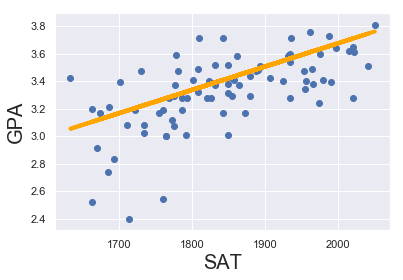

In [9]:
plt.scatter(x1,y)
yhat = 0.2750 + 0.0017*x1

fig1 = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line')

plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

## 2. What are the determinants of a good regression?

It is time to explore the other records of the coefficients table. You can skip this section and go straight to the next section about Multiple Linear Regression but is in this section that we build the foundations for a better understanding of the performance of a regression model.

Let's use the results of our last model. The _std err_ column shows the prediction accuracy for each variable, the lower the standard error, the better the estimate. In other words, **the standard error tells us how much our regression model is most likely or not to make a wrong prediction**. 

Below, it is possible to visualize two red lines encapsulating almost all data points inside the range:

$$[b_0 - std\_err + b_1 x_1, b_0 + std\_err + b_1 x_1]$$

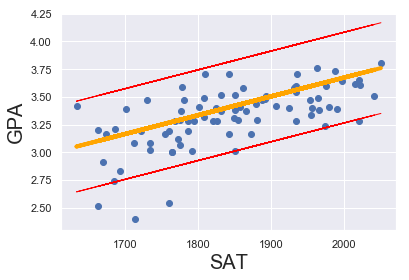

In [10]:
plt.scatter(x1,y)
yhat = 0.2750 + 0.0017*x1
fig2 = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line')

upper_line = 0.2750 + 0.409 + 0.0017*x1
fig3 = plt.plot(x1,upper_line, lw=1, c='red', label = 'Upper line')

lower_line = 0.2750 - 0.409 + 0.0017*x1
fig4 = plt.plot(x1,lower_line, lw=1, c='red', label = 'Lower line')

plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

The next two columns to the right are for the t-statistics and its p-value. Without digging deeper into these matters, it's worth noting that there is a hypothesis involved here. The **Null Hypothesis** of this test is $ H_0 : b = 0$. In other words, is the coefficient equals to zero?

**Essentially, these columns are trying to tell us if a variable is useful or not to our model**. Conveniently, the answer is contained in the p-value column. In statistics, a $p-value < 0.05$ means that the variable is significant to our model performance. Otherwise, we may consider not to include it in the independent variables set. 

Therefore, a p-value of 0.503 to the const coefficient indicates that the constant variable is not significant to our model. This can be justified by the fact that we are only trying to capture the relationship between the SAT and the GPA score. For the SAT variable, a p-value of 0.000 tells us that the SAT score is a significant variable when predicting college GPA.

### Variability: How powerful is our model?

So far, we analyzed the coefficients table only, it is now time to go further and have a look at the first table.

The Model Summary Table holds a bunch of important information to us, there are some self-explanatory variables, like the dependent variable of the model, the model itself, the method and so on. However, we will talk about the **R-squared** now.

The R-squared variable is a relative measure that takes values from the range $[0, 1]$. An R-squared of 0 means that your regression line explains none of the variability of the data. Conversely, an R-squared of 1 implies that your regression line explains all the variability of the data. But be careful now!

In our simple linear regression model, we obtained an R-squared equal to 0.406. Is that a good result? Well, it may be. A low R-squared value implies that the SAT score is not enough to capture all the variability of our data. Other variables such as gender, income, and marital status could provide more information to our model.

## 3. Multiple linear regression

In real-world problems, we need more than one variable to get a good accuracy score in our predictions. As we saw in the last section, the SAT score explained some variability of the dataset but it was not capable of capturing all its variation. 

Usually, we need to add two or more factors to our model in order to explain the variability of some processes. For instance, take the price of a house as a dependent variable of a regression model. We could use the size of the house as the independent variable but it won't capture all the variability of houses prices. A good choice would be to add its location, some additional information like the number of rooms, has or not a pool and so on...

This would be an example of a _Multiple linear regression_. The linear regression equation is as follows:

$$\hat{y} = b_0 + b_1 x_1 + b_2 x_2 +...+ b_k x_k$$

there isn't much to explain about this equation as it is only a generalization of the equation for a simple linear regression.

### How many variables are sufficient to our model? 

To answer this question, let's get our hands dirty with our first multiple linear regression model. Initially, we must load the dataset into the kernel.

In [11]:
path_name = r'C:\Users\alexa\Documents\Data Science Course - Bootcamp\Regression Analysis\datasets\2. Multiple linear regression.csv'
data = pd.read_csv(path_name)

In [12]:
data.head()

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


As you can see, this time we'll be addressing the same problem of predict GPA score with the SAT score plus a random variable that ranges from 1 to 3. This random variable is useless to our model, as it explains none of the variability of the dependent variable. We just added it here to make a point. With that, the equation of our model is given by

$$\hat{y} = b_0 + b_1 x_1 + b_2 x_2$$

In [13]:
y = data['GPA']
x1 = data[['SAT', 'Rand 1,2,3']]

In [14]:
x = sm.add_constant(x1)

In [15]:
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Mon, 04 Mar 2019   Prob (F-statistic):           6.58e-10
Time:                        18:35:43   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Let's compare the results obtained for this model and our first model. Below, we have a table showing a comparison between the R-squared values of each model and also the Adjusted R-squared.
______________________________________________________
| Measure      | Simple lin. reg.| Multiple lin. reg |
|--------------|-----------------|-------------------|
| R-squared    |0.406            | 0.407             |
|Adj. R-squared|0.399            | 0.392             |

Look how the R-squared almost changed nothing in both cases, this implies that the addition of the _random_ independent variable did not improve the explanatory power of our model. On the other hand, we have an even more interesting result when looking at the Adj. R-squared variable.

The **Adjusted R-squared** variable is always less than the R-squared. It **penalizes excessive use of variables in the models that have no strong explanatory power**. We will not dig deeper into the mathematical details about the Adj. R-squared. However, look at how the value for the Multiple lin. reg. model is lower than for the Simple lin. reg., this is evidence that the addition of the _random_ variable is not significant to our model.

Indeed, in a more accurate analysis, if you look at the Coefficients Table it becomes clear that the _random_ variable is useless to our model. It has a $p-value = 0.762$, meaning that we cannot reject the null hypothesis ($H_0 : b_2 = 0$) at a 76% significance level. This is incredibly high!

Another tool that allows us comparing models is the **F-statistic**. The F-statistic follows an [F-distribution](https://en.wikipedia.org/wiki/F-distribution). In other words, there is a hypothesis test here! The test is known for the overall significance of the model. The Null Hypothesis is $H_0 : b_0 = b_1 =$ ... $= b_n = 0$ and the alternative hypothesis is $H_1 : b_i \neq 0$, that is, at least one coefficient is different from zero. 

**What is the interpretation?** if all $b$'s are zero, then none of the independent variables matter. Therefore, our model has no merit. See the comparison between the F-statistic and its p-value for the two models.

___________________________________________________________
| Measure           | Simple lin. reg.| Multiple lin. reg |
|-------------------|-----------------|-------------------|
| F-statistic       |56.05            | 27.76             |
|Prob (F-statistic) |7.20e-11         | 6.58e-10          |

The p-value of the F-statistic for both models is virtually zero, meaning that our model significantly explains the variability of the data. On the other hand, the F-statistic for the Multiple linear regression is half the value. The lower the F-statistic, the closer to a non-significant model.

The point is: cherry pick your data when performing a linear regression. Adding new variables does not necessarily implies  increasing the explainability power of the model.

#### Simplifying the procedure

Now that we have built two regression models you may have noticed that the implementation is very simple. Therefore, we will use this space to define a function to perform the linear regression using stats models in order to avoid code repeatability later on.

In [16]:
def linear_reg(x1, y):
    x = sm.add_constant(x1)
    results = sm.OLS(y, x).fit()
    return results

## 4. Assumptions for Linear Regression

So far, we introduced quite a few notions about regression. Still, for which cases can we perform a linear regression? This section aims to answer this question. As the purpose of this kernel is to provide a better understanding of regression, it is important for you not to skip this section. It is important to know all the regression assumptions and consider them before you perform regression analysis. The regression assumptions are:

    1. Linearity
    2. No endogeneity
    3. Normality and homoscedasticity
    4. No autocorrelation
    5. No multicolinearity

All these assumptions will be explained in the next sections.

### 4.1 Linearity

The linear regression is the simplest non-trivial relationship. It is called linear because the regression equation is linear! How can you verify if the relation between two variables is linear?

The easiest way is to choose an independent variable and plot it against the dependent variable on a scatter plot. The linearity is checked if we obtain a result just like the following

<img src="images\linear curve.png">

On the other hand, examine the following plot. There is no straight line that can fit appropriately to the data points. In this case, a curve line expresses more accurately the data variability. Therefore, it is not recommended to perform a linear regression to this data.

<img src="images\quadratic curve.png">

There are easy ways to fix non-linearity such as

    1. Run a non-linear regression
    2. Apply an exponential transformation
    3. Apply a logarithmical transformation
    
As we are just highlighting the Linear regression assumptions, we will not explore these tools here. What you need to know is that whenever you intend to perform a linear regression, try to see if it is possible! 

If the data cannot be fitted by a straight line, try to make a transformation and only then perform linear regression!

### 4.2 No endogeneity

The second assumption is the so-called no endogeneity of regressors. It refers to the prohibition of a link between independent variables and the errors. It is mathematically expressed by the following equation

$$ \sigma_{X\epsilon} = 0 : \forall x, \epsilon$$

This equation is telling us that the error (the difference between the observed and the predicted values) must not be correlated with any independent variables. This is a problem referred to as **omitted variable bias**. This problem arises when we forget to include a crucial variable in the model. Consider the following case:

the $y$ variable is explained by the $x$ variable and also by a $x^{*}$ variable that was omitted in the model. Chances are that $x$ is correlated to $x^{*}$. However, we did not include it as a regressor. Everything that is not explained by the model goes into the error. So, actually, the error becomes correlated with everything else.
______

Let's try another example. Suppose we are trying to predict the price, $y$, of an apartment building, in central New York City by using only its size, $x$, as a regressor. Then, we obtained the following equation from the model:

$$y = 890345 - 48947 x$$

The yielded result is extremely counterintuitive as we expect that the higher the price, the more expensive the apartment. Therefore, as x (the apartment size) increases, its value decreases. This implies that the covariance between the independent variable and the error is different from zero ($\sigma_{X\epsilon} \neq 0$). Critical thinking time! you can ask yourself questions like:

    1. Where do I draw the sample from?
    2. Can I get a better sample?
    3. Why is bigger real estate cheaper?
    
Let's consider the following: The sample comprises apartment buildings in central New York and is large enough so the problem is not with the sample. Remember that we are in New York! The place with some of the most valuable real estate in the world! we omitted the exact location as a variable. In almost any other city, this factor would not be such a huge headache for us. But, in our particular example, the million dollar suits in the city of New York turn things around. After we add this variable we may get a result like:

$$y = 54209 + 37892 x_{size} + 78234 x_{city}$$

which looks amazing! Larger properties are more expensive!

The lesson here is: advanced knowledge in the subject is helpful! If you do not understand your problem, you can fall into the endogeneity problem.

### 4.3 Normality and Homoscedasticity

The third assumption can be expressed by the equation $\epsilon \sim N(0, \sigma^2)$. Derived from the equation, the third assumption comprises three parts:

   1. **Normality**: 
    We assume the error term is normally distributed. Normal distribution is not required for making a regression but for making inferences. Remember that the t-statistics and the F-statistics apply only when the error is normally distributed. 
    
Note that a possible solution for this problem is to apply the central limit theorem.
    
   2. **Zero Mean**:
    If the error mean is not expected to be zero, then a line will not yield a good fitting. However, having an intercept solves that problem. So, in real life, it is unusual to violate this part of the assumption.
        
   3. **Homoscedasticity**: 
    This part means that the error must have equal variance. Put in another way,
    
$$\sigma^2 _{\epsilon_1} = \sigma^2 _{\epsilon_2} =  ... = \sigma^2 _{\epsilon_n} = 0$$

   What if there is a pattern in the error variance? We will discuss more this topic as it is a bit more confusing than the others.

_____________________________
#### 4.3.1 Homoscedasticity _vs_ Heteroscedasticity: How to detect and visualize

We will go through an example in order to clarify what is Homoscedasticity and Heteroscedasticity. We'll use an example of a cross-sectional study to model the number of automobile accidents by the population of towns and cities. The data is purely fictional but it correct illustrates the problem. This example is based on the article [Heteroscedasticity in Regression Analysis](http://statisticsbyjim.com/regression/heteroscedasticity-regression/) found in [Statistics by Jim](http://statisticsbyjim.com/).

In [17]:
# Import the data
path_name = r'C:\Users\alexa\Documents\Data Science Course - Bootcamp\Regression Analysis\datasets\Heteroscedasticity.csv'
heter_data = pd.read_csv(path_name)

In [18]:
# Explore the data
heter_data.head()

,Accidents,AccidentRate,Population,Weight
0,20,0.000135,147603.989041,0.000007
1,38,0.000062,611903.157933,0.000002
2,17,0.000120,141304.462040,0.000007
3,16,0.000078,204849.503667,0.000005
4,20,0.000131,152426.475662,0.000007


For simplification, we'll perform a Simple Linear regression in which the Population is the independent variable and the number of Accidents is dependent variable.

In [19]:
x1 = heter_data['Population']
y = heter_data['Accidents']

Text(0, 0.5, 'Accidents')

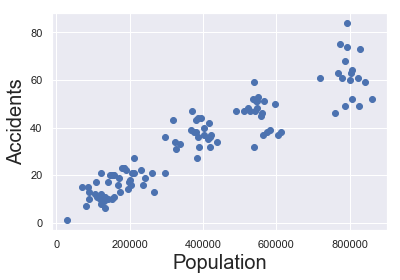

In [20]:
plt.scatter(x1,y)
plt.xlabel('Population', fontsize = 20)
plt.ylabel('Accidents', fontsize = 20)

In [21]:
results = linear_reg(x1, y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Accidents   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     632.4
Date:                Mon, 04 Mar 2019   Prob (F-statistic):           3.03e-46
Time:                        18:35:44   Log-Likelihood:                -360.32
No. Observations:                 107   AIC:                             724.6
Df Residuals:                     105   BIC:                             730.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8219      1.313      4.434      0.000       3.219       8.425
Population  7.186e-05   2.86e-06     25.147      0.000    6.62e-05    7.75e-05
==============================================================================
Omnibus:                        0.310   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.856   Jarque-Bera (JB):                0.066
Skew:                           0.031   Prob(JB):                        0.968
Kurtosis:                       3.104   Cond. No.                     8.81e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

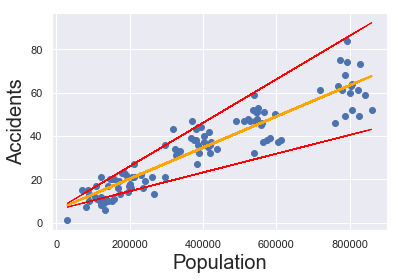

In [22]:
plt.scatter(x1,y)
y_hat = 5.8219 + 0.00007186*x1
fig5 = plt.plot(x1,y_hat, lw=2, c='orange', label = 'regression line')

upper_line = 5.8219 + (0.00007186 + 0.0000286)*x1
fig6 = plt.plot(x1,upper_line, lw=1, c='red', label = 'Upper line')

lower_line = 5.8219 + (0.00007186 - 0.0000286)*x1
fig7 = plt.plot(x1,lower_line, lw=1, c='red', label = 'Lower line')

plt.xlabel('Population', fontsize = 20)
plt.ylabel('Accidents', fontsize = 20)
plt.show()

Look at this plot and compare it to the one in section 2. In this plot, the data spread as we walk from left to right in the x-axis. Following the regression line, it becomes clear that the error is increasing as the population increases. This is a clear signal of _Heteroscedasticity_.

Another way to check for Heteroscedasticity is by assessing the residuals by the fitted values plot. Heteroscedasticity produces a distinctive fan or cone shape in residual plots. The following plot provides us the information we need. Again, we can see that the error variance is different from zero.

Text(0, 0.5, 'Residual')

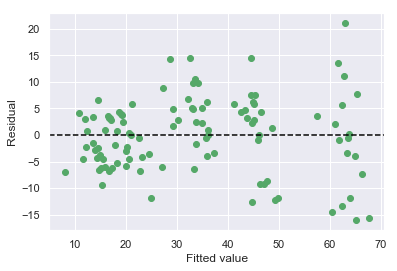

In [23]:
plt.scatter(y_hat, y-y_hat, c='g')
plt.axhline(y=0, color='black', linestyle='--')

plt.xlabel('Fitted value')
plt.ylabel('Residual')

#### 4.3.2 Fixing heteroskedasticity

There are many ways to perform data transformation in order to achieve Homoscedasticity and get better regressions. We will not study all of them here as they are not in the scope of this kernel. If you wish to dig deeper into Heteroscedasticity, I recommend this [link](http://statisticsbyjim.com/regression/heteroscedasticity-regression/).

We can circumvent heteroscedasticity by checking for omitted variables. This is always a good idea! After that, you can look for outliers and try to remove them. Finally, we can apply a **logarithmical transformation** to the data.

For each observation in the dependent variable, calculate its natural log and then create a regression between the log of $y$ and the independent $x$'s. Conversely, you can take the $x$ variable that is causing the trouble and do the same. Let's see an example.

Initially, taking into account the last regression. The population (**x-axis**) data seemed to be largely responsible for the heteroscedasticity. Being so, let's apply a logarithmical transformation to the population data and check our new results.

#### Semi-log Model

In [24]:
# Applying logarithmical Transformation
heter_data['log_population'] = np.log(heter_data['Population'])

In [25]:
x1 = heter_data['log_population']
y = heter_data['Accidents']

In [26]:
results = linear_reg(x1, y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Accidents   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     472.9
Date:                Mon, 04 Mar 2019   Prob (F-statistic):           1.12e-40
Time:                        18:35:44   Log-Likelihood:                -373.36
No. Observations:                 107   AIC:                             750.7
Df Residuals:                     105   BIC:                             756.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -259.6523     13.526    -19.197      0.000    -286.471    -232.833
log_population    23.2110      1.067     21.746      0.000      21.095      25.327
==============================================================================
Omnibus:                       12.211   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.415
Skew:                           0.701   Prob(JB):                      0.00122
Kurtosis:                       4.022   Cond. No.                         223.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

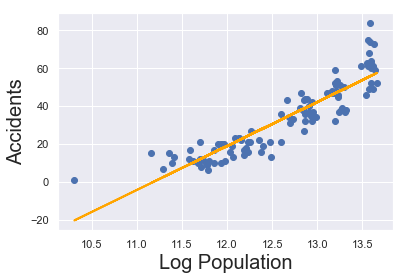

In [27]:
plt.scatter(x1,y)

y_hat = -259.6523 + 23.2110*x1
fig8 = plt.plot(x1,y_hat, lw=2, c='orange', label = 'regression line')

plt.xlabel('Log Population', fontsize = 20)
plt.ylabel('Accidents', fontsize = 20)
plt.show()

Text(0, 0.5, 'Residual')

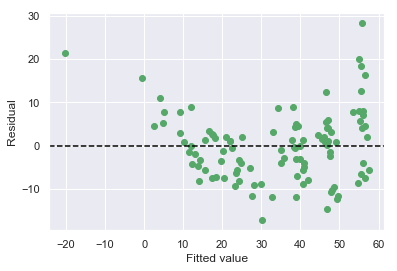

In [28]:
plt.scatter(y_hat, y-y_hat, c='g')
plt.axhline(y=0, color='black', linestyle='--')

plt.xlabel('Fitted value')
plt.ylabel('Residual')

Fantastic! Clearly, we improved our model performance. The new model is called a **Semi-log model** and is expressed by the equation 

$$\hat{y} = b_0 + b_1 \log(x)$$

We can also apply a transformation to the **y-axis** and see if there is an improvement in our model. Let's do it!

#### log-log model

In [29]:
heter_data['log_accidents'] = np.log(heter_data['Accidents'])

In [30]:
y = heter_data['log_accidents']

In [31]:
results = linear_reg(x1, y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_accidents   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     591.9
Date:                Mon, 04 Mar 2019   Prob (F-statistic):           5.90e-45
Time:                        18:35:45   Log-Likelihood:                -12.665
No. Observations:                 107   AIC:                             29.33
Df Residuals:                     105   BIC:                             34.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -7.9563      0.465    -17.121      0.000      -8.878      -7.035
log_population     0.8922      0.037     24.329      0.000       0.819       0.965
==============================================================================
Omnibus:                       26.265   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.830
Skew:                          -0.894   Prob(JB):                     2.27e-14
Kurtosis:                       6.301   Cond. No.                         223.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

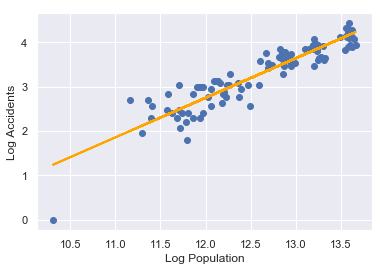

In [32]:
plt.scatter(x1,y)

y_hat = -7.9563 + 0.8922*x1
fig9 = plt.plot(x1,y_hat, lw=2, c='orange', label = 'regression line')

plt.xlabel('Log Population')
plt.ylabel('Log Accidents')
plt.show()

Text(0, 0.5, 'Residual')

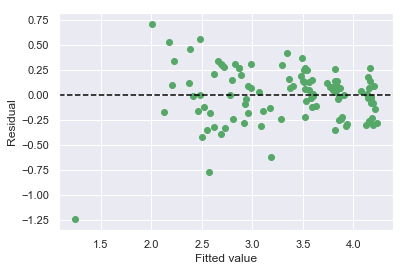

In [33]:
plt.scatter(y_hat, y-y_hat, c='g')
plt.axhline(y=0, color='black', linestyle='--')

plt.xlabel('Fitted value')
plt.ylabel('Residual')

Amazing! As you already realized, the transformations did not extinguish heteroscedasticity but it drove us near homoscedasticity. This model is called **log-log model** and is given by

$$\log y = b_0 + b_1 \log x$$

The interpretation is: As $x$ increases by 1%, $y$ increases by $b_1$%.

That's all for now. As I said, there are many ways to fix heteroscedasticity, here we saw one of the simplest but not much effective solution. I encourage you to study more on homoscedasticity.

### 4.4 No autocorrelation

The penultimate assumption is the no autocorrelation assumption. This is one of the most problematic properties because it cannot be relaxed. Mathematically, the no autocorrelation property means that

$$\sigma_{\epsilon_i \epsilon_j} = 0 : \forall i \neq j$$

In other words, errors are assumed to have no correlation. Cross-sectional data (data that were taken at one moment of time) is highly unlikely to present autocorrelation. On the other hand, it is very common in time series.

Autocorrelation roughly means that the data presents a pattern. Linear regression does not consider that. For example, let's explore the dataset of daily minimum temperatures in Melbourne, Australia, from 1891 to 1991. You can download this dataset [here](https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line). 

The example was adapted from this [article](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/) authored by [Jason Brownlee](https://machinelearningmastery.com/about/).

In [34]:
path_name = r'C:\Users\alexa\Documents\Data Science Course - Bootcamp\Regression Analysis\datasets\Autocorrelation.csv'
auto_data = pd.read_csv(path_name)

In [35]:
auto_data.tail()

,Date,Daily minimum temperatures in Melbourne
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7
3649,1990-12-31,13.0


In [36]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
Date                                       3650 non-null object
Daily minimum temperatures in Melbourne    3650 non-null float64
dtypes: float64(1), object(1)
memory usage: 57.1+ KB


Note that this dataset, differently from the other ones, needs some manipulation before we can actually analyze the data. First of all, the data type for the Date column is object. As we are working with time series, we must adequate this column to a more appropriate data type. That's why we will change its type to datetime. Secondly, we can improve the data analyzes by setting the Date column as the index column. By doing so, we gain efficiency and several tools to manipulate our time series.

In [37]:
auto_data['Date'] = pd.to_datetime(auto_data['Date'])

In [38]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
Date                                       3650 non-null datetime64[ns]
Daily minimum temperatures in Melbourne    3650 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.1 KB


In [39]:
auto_data.set_index('Date', inplace=True)

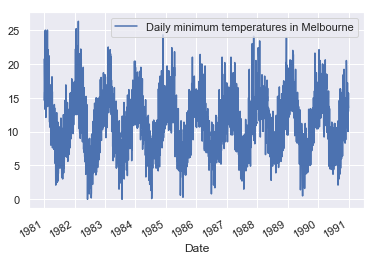

In [40]:
auto_data.plot()

Note how the data present a pattern. Linear regression assumes that the errors are randomly spread around the regression line. That certainly will not be the case.

#### How to detect autocorrelation?

A common way is to plot all the residuals on a graph and **look for patterns**. If you can't find any, then you are safe. 

Also, you can check the value of the **Durbin-Watson test** at the _Additional tests table_ provided by stats models. Generally, its values fall between 0 and 4. 2 indicates no autocorrelation while values below 1 and above 3 are a cause for alarm.

There is no remedy for autocorrelation, the only thing you can do is to avoid the linear regression model. Alternative models are

    1. Autoregressive model
    2. Moving average model
    3. Autoregressive moving average model
    4. Autoregressive integrated moving average model

### 4.5 No Multicollinearity

The last assumption is no multicollinearity. In [Multicollinearity in Regression Analysis: Problems, Detection, and Solutions](http://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/) is stated that 
    
    The interpretation of a regression coefficient is that it represents the mean change in the dependent variable for each 1 unit change in an independent variable when you hold all of the other independent variables constant.
    
This statement is telling us that whenever we change one variable, the others must not be affected. Multicollinearity is just the opposite. If two variables are correlated, changing one implies in also changing the other.

We observe multicollinearity when two or more variables have a **strong** correlation. Mathematically,

$$\rho_{x_i x_j} \approx 1 : \forall i, j ; i \neq j$$

Let's exemplify this point with an equation.

$$y = 3 + 2x$$

$y$ and $x$ are two variables with an exact linear relationship. $y$ can be represented using $x$ and vice-versa. In a model containing $y$ and $x$ we would have perfect multicollinearity ($\rho_{y x} = 1$). This imposes a big problem to our model as the coefficients will be wrongly estimated. In addition, let's agree that if $y$ can be represented using $x$, there is no point using both!

This time, consider two variables $z$ and $t$ with a correlation of $\rho_{z t} = 0.93$. If we had a regression model using $z$ and $t$ we would also have multicollinearity although not perfect. In this case, the assumption is still violated and thus implies that we may face a problem in our model.

#### What problems multicollinearity can cause?

Multicollinearity can cause two main problems:

    1. The variables can vary wildly depending on which variables are in the model. 
    2. Precision reduction of the estimated coefficients. This weakens the statistical power and representativeness of the model. In addition, the p-values might not be trusted in order to identify which variables are statistically significant.
    
Finally, I would like to highlight that **some multicollinearity is not a problem**. If we try to predict the weight of a person and take his/her height and abdominal circumference as independent variables, of course, there will be some correlation degree between these variables. However, this is not problematic!

## 5. Final considerations

Regression analysis describes the relationship between a set of independent variables and one dependent variable. As you may have realized by now, this is an extremely powerful tool. Once the regression model is done we can use it to make predictions and thus make decisions about the problem we are dealing with. 

Although regression models may be easy to implement, they require a set of skills in order to evaluate their results. In this kernel, we studied superficially many aspects that must be considered when making a regression. In addition, we learned how to evaluate regression models and which are the main differences between a Simple Linear Regression and a Multiple Linear regression.

There are several ways to code a regression model. Here we used the python stats models library as it is very helpful to assess the regression performance and tests results. 

I encourage you to look for other ways to implement your own regressions. There is plenty of good regression material out there!

Thank you for your attention and I wish you all the success in your next regressions!